## Analysing who will leave organization using Logistic Regression
---
Dataset is downloaded from kaggle: https://www.kaggle.com/datasets/giripujar/hr-analytics

In following code we are going to analyse HR employee data.
* we will check data and important factors that we need
* we keep factors that are affecting employee, further analyse it
* will create a Logistic regrassion model for predicting who will Leave organization

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load file using pandas
df = pd.read_csv('~/my_code/applied_ai_notebooks/datasets/HR_.csv')

## Lets Explore Dataset

In [3]:
df.shape

(14999, 10)

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Handling Null values

In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

No null values observed in dataset

### Analysing Data

In [6]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [7]:
df.groupby('left').mean().T

left,0,1
satisfaction_level,0.666810,0.440098
last_evaluation,0.715473,0.718113
number_project,3.786664,3.855503
average_montly_hours,199.060203,207.419210
time_spend_company,3.380032,3.876505
Work_accident,0.175009,0.047326
promotion_last_5years,0.026251,0.005321


From above tables, we can draw conclusion that:
* **satisfaction_level** : Satisfaction level seems to be low(0.44) in employee leaving org Vs retained(0.66)
* **average_monthly_hours** : Higher in employees leaving the firm
* **promotion_last_5years** : Employees who got promoted are likely to be retained 

## Visualizing data

#### Impact of Salary on retention

<AxesSubplot:xlabel='salary', ylabel='count'>

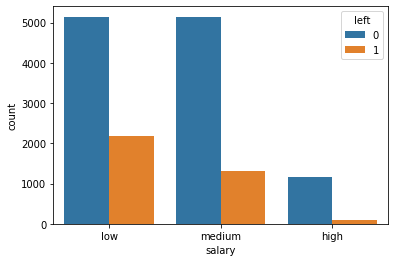

In [8]:
sns.countplot(data=df, x='salary', hue='left')

By Observing above graph, we can say that Higher salary employees likely to not leave firm

#### Department wise Employee rentention rate

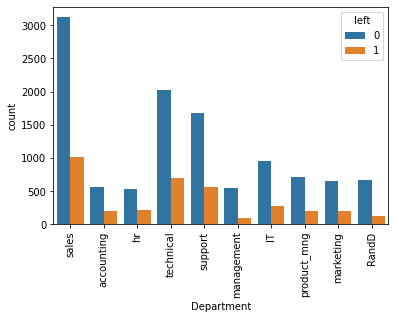

In [25]:
chart = sns.countplot(data=df, x='Department', hue='left')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
None

Department is making minor impact on employee retention, hence we will ignore this feature

## Data Analysis Conclusion
From data analysis so far we have observed and can conclude that:
1. Satisfaction Level
2. Average Monthly Hours
3. Promotion Last 5 years
4. Salary

In [9]:
# we will create new dataframe containing features that we want
new_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [10]:
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


#### Handling salary column
**salary** column contains text data. which is incompatible for machine learning.
Hence we will use **pandas.get_dummies** method to convert it into numbers.

In [11]:
salary_dummies = pd.get_dummies(new_df.salary, prefix='salary')

In [12]:
df_dummies = pd.concat([new_df,salary_dummies],axis='columns')

In [13]:
df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [14]:
df_dummies.drop('salary', axis='columns', inplace=True)
df_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


Dataset is ready

## Working on Model

In [15]:
# lets create our X and y datasets (input and target)
X = df_dummies
y = df.left

In [16]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [18]:
# splitting datasets into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [19]:
len(X_train)

11999

In [20]:
len(X_test)

3000

### Logistic Regression Model

In [21]:
# import logistic regression classifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
model.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0])

### Accuracy of Model

In [24]:
#checking score of model
model.score(X_test,y_test)

0.7653333333333333